<h1 style="color:blue;">Outline of Scenario 9 notebook:</h1> 

- C1.S9.Py01 -  One-hot encoding of income verification category 
- C1.S9.Py02 -  Manually encoding the income verification category
- C1.S9.Py03 -  Combining multiple categories of verified income and using label encoding
- C1.S9.Py04 -  Creating a new regression model with income verification
- C1.S9.Py05 -  Adding an interaction feature variable and running a new regression model


In [2]:
#Code Block 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#style options 

%matplotlib inline  
#if you want graphs to automatically without plt.show

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

plt.style.use('seaborn-v0_8') #a style that can be used for plots - see style reference above



In [3]:
#Code Block 2
df = pd.read_csv('data/Scenario9.csv', index_col = 0, header=0) 
    #DOES set the first column to the index
    # and the top row as the headers

In [6]:
#Code Block 3
df.head(3)

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,NaN,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019,0.081522,2.889228,0.149279,0.069772
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,NaN,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018,0.092593,1.411130,0.100933,0.043083
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,Verified,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019,0.208333,3.165139,0.444943,0.162528


In [8]:
#Code Block 4
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      30071 non-null  int64  
 1   Loan ID                        30071 non-null  int64  
 2   Origination Date               30071 non-null  object 
 3   Interest Rate                  30071 non-null  float64
 4   Amount Funded                  30071 non-null  int64  
 5   Total Debt                     30071 non-null  float64
 6   Annual Income                  30071 non-null  int64  
 7   Revolving Accounts             30071 non-null  float64
 8   Total Revolving Credit Line    30071 non-null  float64
 9   Term                           30071 non-null  int64  
 10  Grade                          30071 non-null  object 
 11  Employee Title                 28396 non-null  object 
 12  Length of Employment           28990 non-null  floa

<h2 style="color:blue;">C1.S9.Py01 - One-hot encoding of verified income category</h2>



In [11]:
#Code Block 5
df['Income Verification'].value_counts(dropna=False)

Income Verification
Verified           13599
NaN                11267
Source Verified     5205
Name: count, dtype: int64

### Fill in NaN values with "Unverified"

In [15]:
#Code Block 6
df['Income Verification'] = df['Income Verification'].fillna("Unverified")
df['Income Verification'].value_counts(dropna=False)

Income Verification
Verified           13599
Unverified         11267
Source Verified     5205
Name: count, dtype: int64

In [17]:
#Code Block 7
df_IncomeVerification = pd.DataFrame(df['Income Verification'])
df_IncomeVerification.head()

,Income Verification
6,Unverified
8,Unverified
4,Verified
7,Verified
9,Unverified


### Create 3 columns based on Income Verification 
- For every unique value in Income Verification, a column will be created.  
- Since there are 3 unique values in Income Verification, there will be three columns:
    - Verified
    - Unverified     
    - Source Verified
- If a row is **Verified**, then:
    - Verified = 1
    - Unverified = 0
    - Source Verified = 0
- If a row is **Unverified**, then:
    - Verified = 0
    - Unverified = 1
    - Source Verified = 0
- If a row is **Source Verified**, then:
    - Verified = 0
    - Unverified = 0
    - Source Verified = 1

In [20]:
#Code Block 8
dummies_IncomeVerification = pd.get_dummies(df_IncomeVerification['Income Verification'], drop_first = False)
dummies_IncomeVerification.head()

,Source Verified,Unverified,Verified
6,False,True,False
8,False,True,False
4,False,False,True
7,False,False,True
9,False,True,False


In [22]:
#Code Block 9
df_IncomeVerification = pd.concat([df_IncomeVerification, dummies_IncomeVerification], axis = 1)
df_IncomeVerification.head()

,Income Verification,Source Verified,Unverified,Verified
6,Unverified,False,True,False
8,Unverified,False,True,False
4,Verified,False,False,True
7,Verified,False,False,True
9,Unverified,False,True,False


<h3 style="color:blue;">Let's create dummy variables in a more efficient way </h3>

- Create the dummy variables *(ex. Source Verified, Unverified, and Verified)*
- Concatenate with the original DataFrame *(ex. df_IncomeVerification with df)*
- Drop the original variable that was used to create the dummy variables *(ex. Income Verification)*

In [24]:
#Code Block 10
df_dummy = df.copy()

In [30]:
#Code Block 11
dummies_IncomeVerification = pd.get_dummies(df_dummy['Income Verification'], drop_first = False)
df_dummy = pd.concat([df_dummy, dummies_IncomeVerification], axis = 1)
df_dummy = df_dummy.drop(["Income Verification"], axis = 1)
df_dummy.head()

KeyError: 'Income Verification'

<h2 style="color:blue;">C1.S9.Py02 - Label encoding of verified income category</h2>

### 4 ways to convert a categorical variable (object) into a numerical variable (int)
- One-hot encoding (dummy variables) ***Previous Video***
- pandas.DataFrame.replace
- A custom function
- Label encoding from sci-kit learn(sequential numbering based on alphabetical order) ***Next Video***


### Use pandas.DataFrame.replace
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Examples:
    - https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
    - http://queirozf.com/entries/pandas-dataframe-replace-examples

In [34]:
#Code Block 12
df_label_ex1 = df.copy()

In [36]:
#Code Block 13
df_label_ex1 = df_label_ex1.replace({"Unverified":0})
df_label_ex1.head()

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,0,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019,0.081522,2.889228,0.149279,0.069772
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,0,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018,0.092593,1.411130,0.100933,0.043083
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,Verified,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019,0.208333,3.165139,0.444943,0.162528
7,771211,888522,11/20/19,21.49,35000,354982.0,114000,38651.0,79800.0,60,E,Nevada Gaming Control Board,7.0,MORTGAGE,Verified,credit_card,891xx,NV,1.0,1,19,61,60 months,2,11,2019,0.307018,3.113877,0.484348,0.339044
9,780866,812348,4/24/19,11.14,3600,175788.0,65000,12936.0,39400.0,36,B,City of Ithaca,3.0,MORTGAGE,0,car,488xx,MI,NaN,0,22,37,36 months,2,4,2019,0.055385,2.704431,0.328325,0.199015


In [38]:
#Code Block 14
df_label_ex2 = df.copy()

In [40]:
#Code Block 15
df_label_ex2 = df_label_ex2.replace({'Unverified': 0, 'Verified':1, "Source Verified":2})
df_label_ex2.head()

/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_73793/2034947683.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_label_ex2 = df_label_ex2.replace({'Unverified': 0, 'Verified':1, "Source Verified":2})


,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,0,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019,0.081522,2.889228,0.149279,0.069772
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,0,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018,0.092593,1.411130,0.100933,0.043083
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,1,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019,0.208333,3.165139,0.444943,0.162528
7,771211,888522,11/20/19,21.49,35000,354982.0,114000,38651.0,79800.0,60,E,Nevada Gaming Control Board,7.0,MORTGAGE,1,credit_card,891xx,NV,1.0,1,19,61,60 months,2,11,2019,0.307018,3.113877,0.484348,0.339044
9,780866,812348,4/24/19,11.14,3600,175788.0,65000,12936.0,39400.0,36,B,City of Ithaca,3.0,MORTGAGE,0,car,488xx,MI,NaN,0,22,37,36 months,2,4,2019,0.055385,2.704431,0.328325,0.199015


In [44]:
#Code Block 16
print(df_label_ex2['Income Verification'].value_counts())
df_label_ex2.info()

Income Verification
1    13599
0    11267
2     5205
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      30071 non-null  int64  
 1   Loan ID                        30071 non-null  int64  
 2   Origination Date               30071 non-null  object 
 3   Interest Rate                  30071 non-null  float64
 4   Amount Funded                  30071 non-null  int64  
 5   Total Debt                     30071 non-null  float64
 6   Annual Income                  30071 non-null  int64  
 7   Revolving Accounts             30071 non-null  float64
 8   Total Revolving Credit Line    30071 non-null  float64
 9   Term                           30071 non-null  int64  
 10  Grade                          30071 non-null  object 
 11  Employee Title                 2

### Custom Function for converting categorical variable to numeric

In [46]:
#Code Block 17
df_label_ex3 = df.copy()

### Create a new variable

In [51]:
#Code Block 18
def incomever(v):
    if v['Income Verification'] == 'Source Verified':
        return 2
    elif v['Income Verification'] == 'Verified':
        return 1
    else:
        return 0
df_label_ex3['IncomeVer_num'] = df_label_ex3.apply(incomever, axis = 1)
display(df_label_ex3[['Income Verification', 'IncomeVer_num']].head())
df_label_ex3[['Income Verification', 'IncomeVer_num']].dtypes

,Income Verification,IncomeVer_num
6,Unverified,0
8,Unverified,0
4,Verified,1
7,Verified,1
9,Unverified,0


Income Verification    object
IncomeVer_num           int64
dtype: object

### Replace categorcial variable with numeric values with function

In [54]:
#Code Block 19
df_label_ex4 = df.copy()

In [56]:
#Code Block 20
def incomever(v):
    if v['Income Verification'] == 'Source Verified':
        return 2
    elif v['Income Verification'] == 'Verified':
        return 1
    else:
        return 0
df_label_ex4['Income Verification'] = df_label_ex4.apply(incomever, axis = 1)
display(df_label_ex4.head())
df_label_ex4['Income Verification'].dtypes

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Income Verification,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,0,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019,0.081522,2.889228,0.149279,0.069772
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,0,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018,0.092593,1.411130,0.100933,0.043083
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,1,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019,0.208333,3.165139,0.444943,0.162528
7,771211,888522,11/20/19,21.49,35000,354982.0,114000,38651.0,79800.0,60,E,Nevada Gaming Control Board,7.0,MORTGAGE,1,credit_card,891xx,NV,1.0,1,19,61,60 months,2,11,2019,0.307018,3.113877,0.484348,0.339044
9,780866,812348,4/24/19,11.14,3600,175788.0,65000,12936.0,39400.0,36,B,City of Ithaca,3.0,MORTGAGE,0,car,488xx,MI,NaN,0,22,37,36 months,2,4,2019,0.055385,2.704431,0.328325,0.199015


dtype('int64')

<h2 style="color:blue;">C1.S9.Py03 - Combining multiple categories of verified income and using label encoding</h2>



In [63]:
#Code Block 21
df_reg = df.copy()

In [65]:
#Code Block 22
df_reg['Income Verification'].value_counts()

Income Verification
Verified           13599
Unverified         11267
Source Verified     5205
Name: count, dtype: int64

In [67]:
#Code Block 23
df_reg = df_reg.replace({'Source Verified': 'Verified'})
df_reg['Income Verification'].value_counts()

Income Verification
Verified      18804
Unverified    11267
Name: count, dtype: int64

### What is scikit-learn?
- Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.
- It is the most common machine learning library.

https://scikit-learn.org/stable/index.html

In [70]:
#Code Block 24
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [71]:
#Code Block 25
df_reg['Income Verification'].head()

6    Unverified
8    Unverified
4      Verified
7      Verified
9    Unverified
Name: Income Verification, dtype: object

### Label encoder converts categorical variables to numeric in alphabetical order

In [75]:
#Code Block 26
df_reg['IncomeVer_num'] = lc.fit_transform(df_reg['Income Verification'])
df_reg[['Income Verification', 'IncomeVer_num']].head() 

,Income Verification,IncomeVer_num
6,Unverified,0
8,Unverified,0
4,Verified,1
7,Verified,1
9,Unverified,0


### Drop ['Income Verification'] and rename ['IncomeVer_num'] to ['Income Verification']

In [77]:
#Code Block 27
df_reg = df_reg.drop(["Income Verification"], axis = 1)
df_reg = df_reg.rename(columns = {'IncomeVer_num':'Income Verification'})
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      30071 non-null  int64  
 1   Loan ID                        30071 non-null  int64  
 2   Origination Date               30071 non-null  object 
 3   Interest Rate                  30071 non-null  float64
 4   Amount Funded                  30071 non-null  int64  
 5   Total Debt                     30071 non-null  float64
 6   Annual Income                  30071 non-null  int64  
 7   Revolving Accounts             30071 non-null  float64
 8   Total Revolving Credit Line    30071 non-null  float64
 9   Term                           30071 non-null  int64  
 10  Grade                          30071 non-null  object 
 11  Employee Title                 28396 non-null  object 
 12  Length of Employment           28990 non-null  floa

<h2 style="color:blue;">C1.S9.Py04 - Creating a new regression model with income verification</h2>



In [79]:
#Code Block 28
df_reg.head()

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermNum,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification
6,735990,789789,2/17/19,7.62,7500,265809.0,92000,6419.0,43000.0,36,A,TD Bank,4.0,MORTGAGE,credit_card,030xx,NH,NaN,2,5,37,36 months,6,2,2019,0.081522,2.889228,0.149279,0.069772,0
8,778284,746115,12/13/18,6.03,10000,152402.0,108000,4653.0,46100.0,36,A,"FlightStats, Inc.",1.0,MORTGAGE,home_improvement,750xx,TX,NaN,0,10,37,36 months,3,12,2018,0.092593,1.411130,0.100933,0.043083,0
4,603349,885844,11/17/19,16.29,15000,227890.0,72000,11702.0,26300.0,36,C,NaN,NaN,MORTGAGE,house,341xx,FL,NaN,1,18,37,36 months,6,11,2019,0.208333,3.165139,0.444943,0.162528,1
7,771211,888522,11/20/19,21.49,35000,354982.0,114000,38651.0,79800.0,60,E,Nevada Gaming Control Board,7.0,MORTGAGE,credit_card,891xx,NV,1.0,1,19,61,60 months,2,11,2019,0.307018,3.113877,0.484348,0.339044,1
9,780866,812348,4/24/19,11.14,3600,175788.0,65000,12936.0,39400.0,36,B,City of Ithaca,3.0,MORTGAGE,car,488xx,MI,NaN,0,22,37,36 months,2,4,2019,0.055385,2.704431,0.328325,0.199015,0


In [81]:
#Code Block 29
df_reg.columns

Index(['Member ID', 'Loan ID', 'Origination Date', 'Interest Rate',
       'Amount Funded', 'Total Debt', 'Annual Income', 'Revolving Accounts',
       'Total Revolving Credit Line', 'Term', 'Grade', 'Employee Title',
       'Length of Employment', 'Home Ownership', 'Loan Purpose',
       'Zip Code of Residence', 'State of Residence',
       'Delinquencies Past 24 Months', 'Credit Inquires Last 6 Months',
       'Open Accounts', 'TermNum', 'TermString', 'Day', 'Month', 'Year',
       'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
       'Income Verification'],
      dtype='object')

In [83]:
#Code Block 30
df_reg = df_reg[['Interest Rate', 'Amount Funded', 'Total Debt', 'Annual Income', 'Revolving Accounts',
                'Total Revolving Credit Line', 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
                'Income Verification']]
X = df_reg.drop(["Interest Rate"], axis = 1)
y = df_reg[['Interest Rate']]

In [85]:
#Code Block 31
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30071 entries, 6 to 30067
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Amount Funded                30071 non-null  int64  
 1   Total Debt                   30071 non-null  float64
 2   Annual Income                30071 non-null  int64  
 3   Revolving Accounts           30071 non-null  float64
 4   Total Revolving Credit Line  30071 non-null  float64
 5   Loan_Income                  30071 non-null  float64
 6   Debt_Income                  30071 non-null  float64
 7   RevBal_Line                  30071 non-null  float64
 8   RevBal_Income                30071 non-null  float64
 9   Income Verification          30071 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 2.5 MB


In [87]:
#Code Block 32
import statsmodels
import statsmodels.api as sm

In [89]:
#Code Block 33
X = sm.add_constant(X) # adding a constant

reg1 = sm.OLS(y, X).fit()

predictions1 = reg1.predict(X) 
resid1 = reg1.resid
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     1308.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:39:43   Log-Likelihood:                -80246.
No. Observations:               30071   AIC:                         1.605e+05
Df Residuals:                   30060   BIC:                         1.606e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           8.8345      0.095     93.197      0.000       8.649       9.020
Amount Funded                6.018e-05   4.31e-06     13.966      0.000    5.17e-05    6.86e-05
Total Debt                  -1.509e-06   2.81e-07     -5.373      0.000   -2.06e-06   -9.59e-07
Annual Income                 -1.3e-06   3.18e-07     -4.086      0.000   -1.92e-06   -6.77e-07
Revolving Accounts           4.099e-05   2.61e-06     15.716      0.000    3.59e-05    4.61e-05
Total Revolving Credit Line -3.562e-05    1.8e-06    -19.771      0.000   -3.92e-05   -3.21e-05
Loan_Income                     6.6662      0.317     21.053      0.000       6.046       7.287
Debt_Income                    -0.2337      0.024     -9.917      0.000      -0.280      -0.188
RevBal_Line                     5.9155      0.131     45.139      0.000       5.659       6.172
RevBal_Income                  -2.8404      0.190    -14.947      0.000      -3.213      -2.468
Income Verification             1.4897      0.045     32.747      0.000       1.401       1.579
==============================================================================
Omnibus:                      371.080   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.158
Skew:                           0.258   Prob(JB):                     9.33e-82
Kurtosis:                       2.820   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
#Code Block 34

#Create Predictions dataframe
df_predictions1 = pd.DataFrame(predictions1)
df_predictions1=df_predictions1.rename(columns = {0:'Int_Pred1'})

#Create Residuals dataframe
df_resid1 = pd.DataFrame(resid1)
df_resid1=df_resid1.rename(columns = {0:'Resid1'})


#Concat results into one dataframe
df_reg_results = pd.concat([df_reg, df_predictions1, df_resid1], axis=1)
df_reg_results.head()

,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,Int_Pred1,Resid1
6,7.62,7500,265809.0,92000,6419.0,43000.0,0.081522,2.889228,0.149279,0.069772,0,8.049447,-0.429447
8,6.03,10000,152402.0,108000,4653.0,46100.0,0.092593,1.411130,0.100933,0.043083,0,8.376519,-2.346519
4,16.29,15000,227890.0,72000,11702.0,26300.0,0.208333,3.165139,0.444943,0.162528,1,13.151544,3.138456
7,21.49,35000,354982.0,114000,38651.0,79800.0,0.307018,3.113877,0.484348,0.339044,1,13.709199,7.780801
9,11.14,3600,175788.0,65000,12936.0,39400.0,0.055385,2.704431,0.328325,0.199015,0,8.942119,2.197881


<Axes: xlabel='Int_Pred1', ylabel='Resid1'>

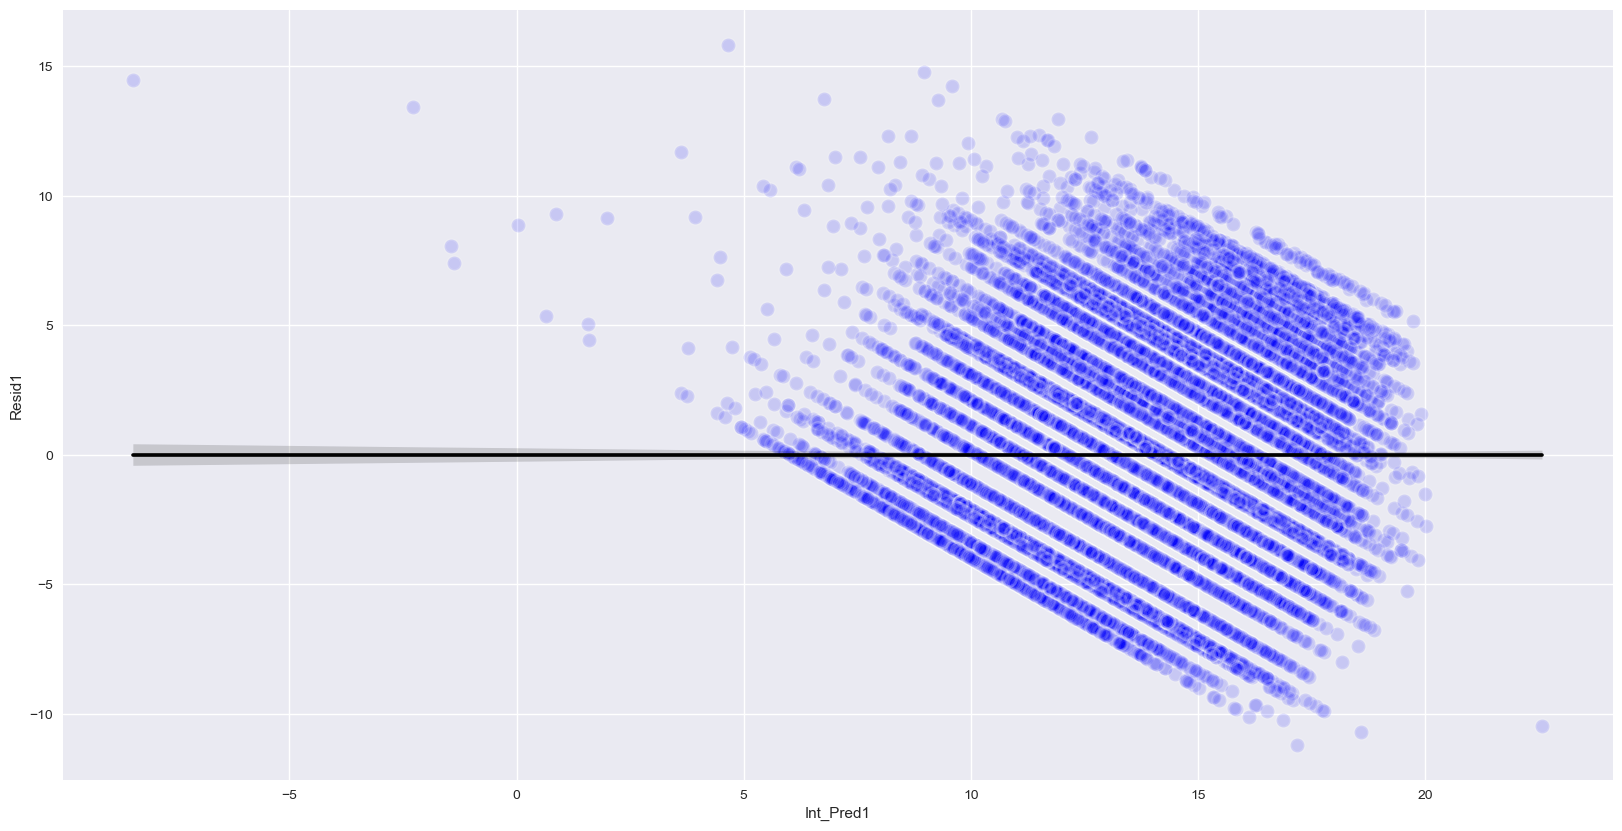

In [97]:
#Code Block 35
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred1', y='Resid1', 
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})

In [99]:
#Code Block 36
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
#Code Block 37
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,22.2,const
4,7.5,Revolving Accounts
5,7.3,Total Revolving Credit Line
2,5.0,Total Debt
7,3.3,Debt_Income
9,3.1,RevBal_Income
1,3.0,Amount Funded
6,2.8,Loan_Income
8,2.2,RevBal_Line
3,1.6,Annual Income


In [103]:
#Code Block 38

corrMatrix = df_reg.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix,3)

,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification
Interest Rate,1.000,0.242,-0.095,-0.025,0.006,-0.173,0.279,-0.100,0.403,0.055,0.249
Amount Funded,0.242,1.000,0.298,0.257,0.304,0.325,0.586,0.116,0.104,0.126,0.367
Total Debt,-0.095,0.298,1.000,0.417,0.457,0.429,-0.163,0.732,0.071,0.057,0.172
Annual Income,-0.025,0.257,0.417,1.000,0.311,0.285,-0.207,0.040,0.040,-0.100,0.096
Revolving Accounts,0.006,0.304,0.457,0.311,1.000,0.848,0.032,0.172,0.241,0.619,0.151
Total Revolving Credit Line,-0.173,0.325,0.429,0.285,0.848,1.000,0.031,0.174,-0.135,0.519,0.128
Loan_Income,0.279,0.586,-0.163,-0.207,0.032,0.031,1.000,-0.013,0.072,0.326,0.262
Debt_Income,-0.100,0.116,0.732,0.040,0.172,0.174,-0.013,1.000,0.052,0.137,0.167
RevBal_Line,0.403,0.104,0.071,0.040,0.241,-0.135,0.072,0.052,1.000,0.322,0.114
RevBal_Income,0.055,0.126,0.057,-0.100,0.619,0.519,0.326,0.137,0.322,1.000,0.147


<Axes: title={'center': 'Correlation Heat Map'}>

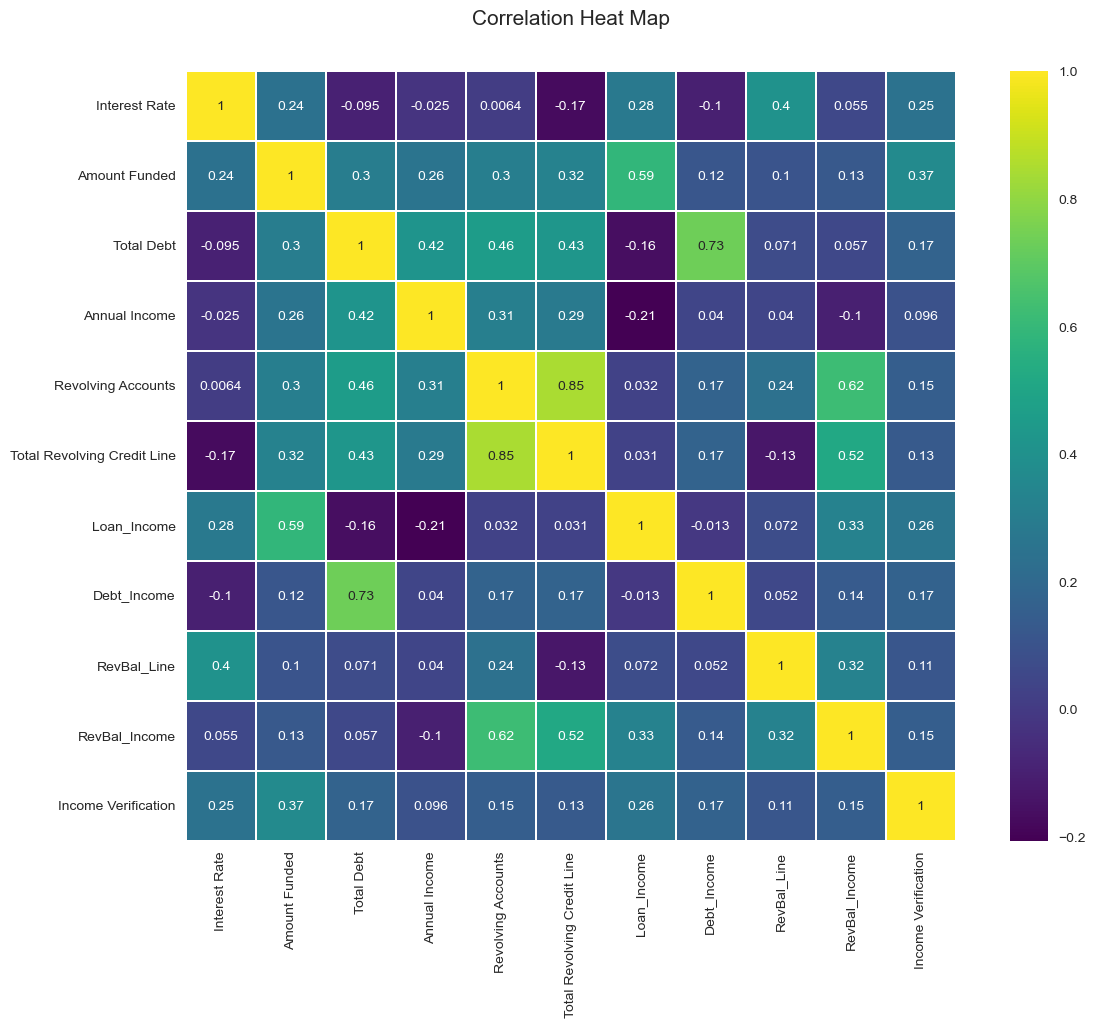

In [105]:
#Code Block 39
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Correlation Heat Map', y=1.05, size=15)
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

<h2 style="color:blue;">C1.S9.Py05 - Adding an interaction feature variable and running a new regression model</h2>

- What is an interaction variable?
    - https://statisticsbyjim.com/regression/interaction-effects/

### Create a variable that shows interactions between ['Income Verification'] and ['Annual Income']
- Multiply  ['Income Verification'] and ['Annual Income'] into a new variable named ['IncVer_Income_act']

In [108]:
#Code Block 40
df_reg.head()

,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification
6,7.62,7500,265809.0,92000,6419.0,43000.0,0.081522,2.889228,0.149279,0.069772,0
8,6.03,10000,152402.0,108000,4653.0,46100.0,0.092593,1.411130,0.100933,0.043083,0
4,16.29,15000,227890.0,72000,11702.0,26300.0,0.208333,3.165139,0.444943,0.162528,1
7,21.49,35000,354982.0,114000,38651.0,79800.0,0.307018,3.113877,0.484348,0.339044,1
9,11.14,3600,175788.0,65000,12936.0,39400.0,0.055385,2.704431,0.328325,0.199015,0


In [110]:
#Code Block 41
df_reg['IncVer_Income_act'] = df_reg['Annual Income'] * df_reg['Income Verification']
df_reg.head()

,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act
6,7.62,7500,265809.0,92000,6419.0,43000.0,0.081522,2.889228,0.149279,0.069772,0,0
8,6.03,10000,152402.0,108000,4653.0,46100.0,0.092593,1.411130,0.100933,0.043083,0,0
4,16.29,15000,227890.0,72000,11702.0,26300.0,0.208333,3.165139,0.444943,0.162528,1,72000
7,21.49,35000,354982.0,114000,38651.0,79800.0,0.307018,3.113877,0.484348,0.339044,1,114000
9,11.14,3600,175788.0,65000,12936.0,39400.0,0.055385,2.704431,0.328325,0.199015,0,0


In [112]:
#Code Block 42
X = df_reg.drop(["Interest Rate"], axis = 1) #this will include IncVer_Income_act
y = df_reg[['Interest Rate']]

In [114]:
#Code Block 43
X = sm.add_constant(X) # adding a constant

reg2 = sm.OLS(y, X).fit()

predictions2 = reg2.predict(X) 
resid2 = reg2.resid
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1228.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:47:02   Log-Likelihood:                -80094.
No. Observations:               30071   AIC:                         1.602e+05
Df Residuals:                   30059   BIC:                         1.603e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          10.1251      0.120     84.502      0.000       9.890      10.360
Amount Funded                7.824e-05   4.41e-06     17.741      0.000    6.96e-05    8.69e-05
Total Debt                  -1.462e-06   2.79e-07     -5.231      0.000   -2.01e-06   -9.14e-07
Annual Income               -2.214e-05   1.23e-06    -17.934      0.000   -2.46e-05   -1.97e-05
Revolving Accounts           3.774e-05    2.6e-06     14.505      0.000    3.26e-05    4.28e-05
Total Revolving Credit Line -3.314e-05    1.8e-06    -18.430      0.000   -3.67e-05   -2.96e-05
Loan_Income                     5.1644      0.327     15.814      0.000       4.524       5.805
Debt_Income                    -0.2217      0.023     -9.450      0.000      -0.268      -0.176
RevBal_Line                     6.0765      0.131     46.485      0.000       5.820       6.333
RevBal_Income                  -2.8887      0.189    -15.276      0.000      -3.259      -2.518
Income Verification             0.1088      0.091      1.194      0.232      -0.070       0.287
IncVer_Income_act            2.101e-05    1.2e-06     17.465      0.000    1.87e-05    2.34e-05
==============================================================================
Omnibus:                      343.048   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.315
Skew:                           0.247   Prob(JB):                     1.71e-75
Kurtosis:                       2.826   Cond. No.                     4.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
#Code Block 44

#Create Predictions dataframe
df_predictions2 = pd.DataFrame(predictions2)
df_predictions2=df_predictions2.rename(columns = {0:'Int_Pred2'})

#Create Residuals dataframe
df_resid2 = pd.DataFrame(resid2)
df_resid2=df_resid2.rename(columns = {0:'Resid2'})


#Concat results into one dataframe
df_reg_results2 = pd.concat([df_reg, df_predictions1, df_resid1, df_predictions2, df_resid2], axis=1)
df_reg_results2.head()

,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,Int_Pred1,Resid1,Int_Pred2,Resid2
6,7.62,7500,265809.0,92000,6419.0,43000.0,0.081522,2.889228,0.149279,0.069772,0,0,8.049447,-0.429447,7.589416,0.030584
8,6.03,10000,152402.0,108000,4653.0,46100.0,0.092593,1.411130,0.100933,0.043083,0,0,8.376519,-2.346519,7.595331,-1.565331
4,16.29,15000,227890.0,72000,11702.0,26300.0,0.208333,3.165139,0.444943,0.162528,1,72000,13.151544,3.138456,13.171442,3.118558
7,21.49,35000,354982.0,114000,38651.0,79800.0,0.307018,3.113877,0.484348,0.339044,1,114000,13.709199,7.780801,13.997548,7.492452
9,11.14,3600,175788.0,65000,12936.0,39400.0,0.055385,2.704431,0.328325,0.199015,0,0,8.942119,2.197881,8.999609,2.140391


<Axes: xlabel='Int_Pred2', ylabel='Resid2'>

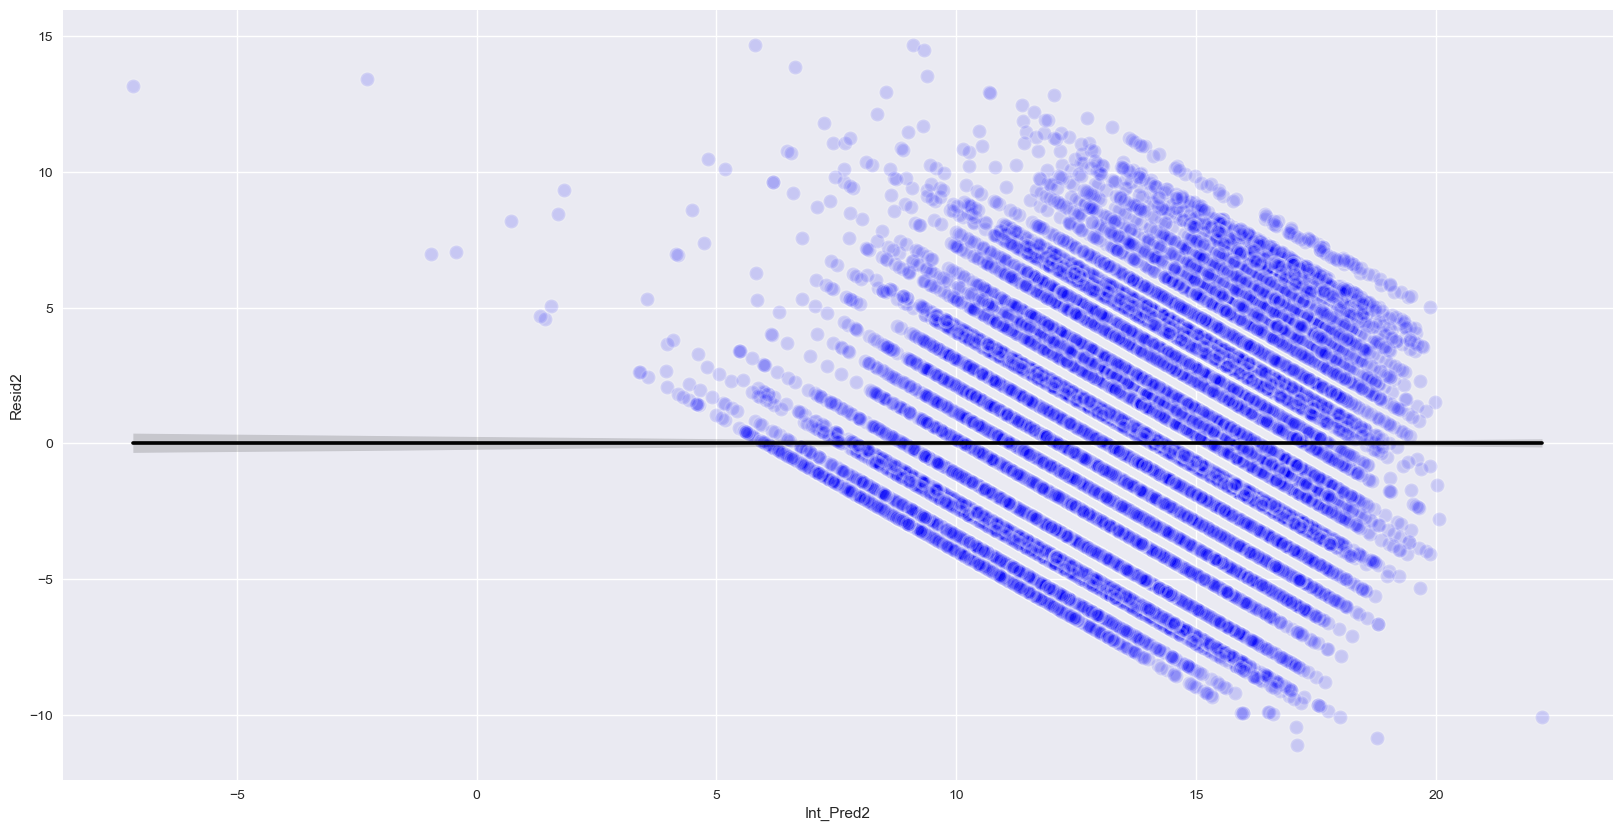

In [122]:
#Code Block 45
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred2', y='Resid2', 
              data = df_reg_results2, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})

In [123]:
#Code Block 46
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,35.8,const
11,27.1,IncVer_Income_act
3,24.4,Annual Income
4,7.5,Revolving Accounts
5,7.3,Total Revolving Credit Line
2,5.0,Total Debt
10,4.9,Income Verification
7,3.3,Debt_Income
1,3.1,Amount Funded
9,3.1,RevBal_Income


In [124]:
#Code Block 47

corrMatrix = df_reg.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix,3)

,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act
Interest Rate,1.000,0.242,-0.095,-0.025,0.006,-0.173,0.279,-0.100,0.403,0.055,0.249,0.091
Amount Funded,0.242,1.000,0.298,0.257,0.304,0.325,0.586,0.116,0.104,0.126,0.367,0.336
Total Debt,-0.095,0.298,1.000,0.417,0.457,0.429,-0.163,0.732,0.071,0.057,0.172,0.394
Annual Income,-0.025,0.257,0.417,1.000,0.311,0.285,-0.207,0.040,0.040,-0.100,0.096,0.910
Revolving Accounts,0.006,0.304,0.457,0.311,1.000,0.848,0.032,0.172,0.241,0.619,0.151,0.317
Total Revolving Credit Line,-0.173,0.325,0.429,0.285,0.848,1.000,0.031,0.174,-0.135,0.519,0.128,0.278
Loan_Income,0.279,0.586,-0.163,-0.207,0.032,0.031,1.000,-0.013,0.072,0.326,0.262,-0.052
Debt_Income,-0.100,0.116,0.732,0.040,0.172,0.174,-0.013,1.000,0.052,0.137,0.167,0.074
RevBal_Line,0.403,0.104,0.071,0.040,0.241,-0.135,0.072,0.052,1.000,0.322,0.114,0.072
RevBal_Income,0.055,0.126,0.057,-0.100,0.619,0.519,0.326,0.137,0.322,1.000,0.147,-0.020


<Axes: title={'center': 'Correlation Heat Map'}>

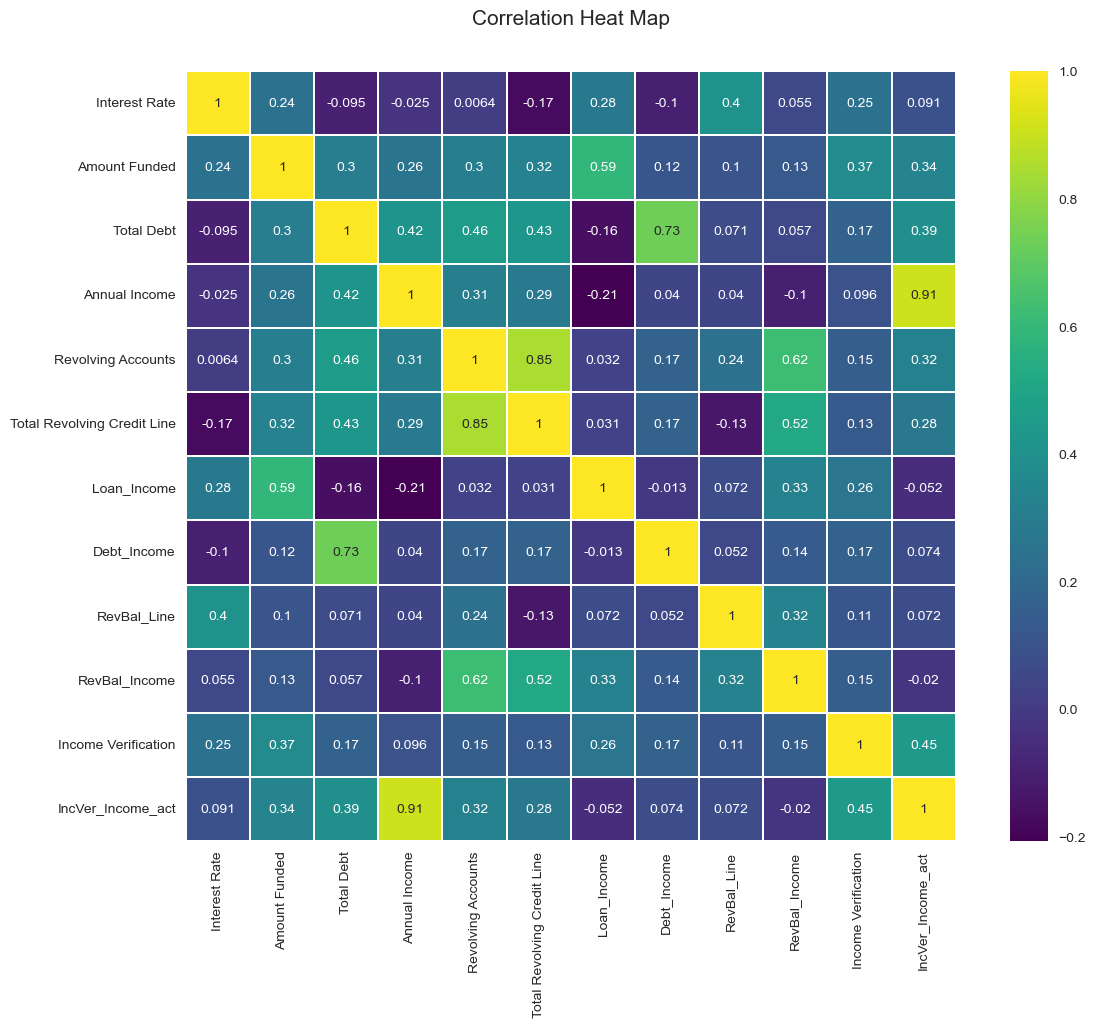

In [125]:
#Code Block 48
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Correlation Heat Map', y=1.05, size=15)
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)